In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo
from sklearn import preprocessing
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
import seaborn as sns


def trainPipelineModel(pipeline, model):
  pipeline.fit(X, y)
  X_processed = pipeline.transform(X)

  # Split
  X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.4, random_state=42)

  model.fit(X_train, y_train)
  return model, X_test, y_test

def displayMetrics(model, X_test, y_test, x_labels, y_label):
  y_pred = model.predict(X_test)

  print("Coefficients: \n", model.coef_)
  print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
  print("Root mean squared error: %.2f" % root_mean_squared_error(y_test, y_pred))
  print("R2: %.2f" % r2_score(y_test, y_pred))

  _, col = X_test.shape
  for i in range(col):
    x = X_test[:, i]
    lists = sorted(zip(*[x, y_pred]))
    new_x, new_y = list(zip(*lists))
    plt.scatter(x, y_test)
    plt.xlabel(x_labels[i])
    plt.ylabel(y_label)
    plt.plot(new_x, new_y, color="red")
    plt.show()

Coefficients: 
 [[ 0.04443137 -0.14344872  0.78408676  0.98431321  5.3704725  -5.42375007
  -1.06963504  1.30085398]]
Mean squared error: 4.80
Root mean squared error: 2.19
R2: 0.52


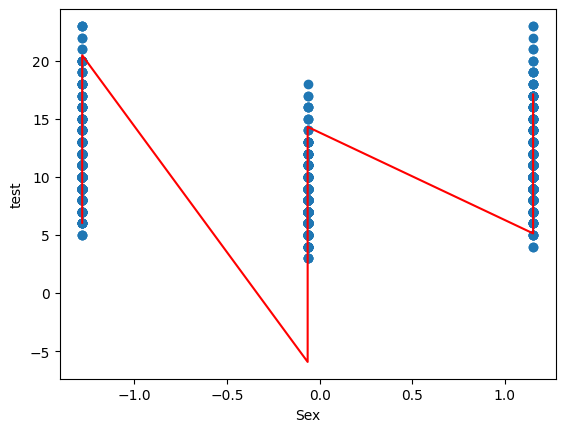

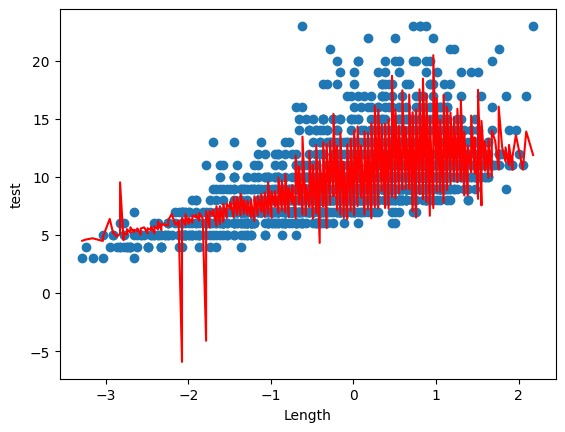

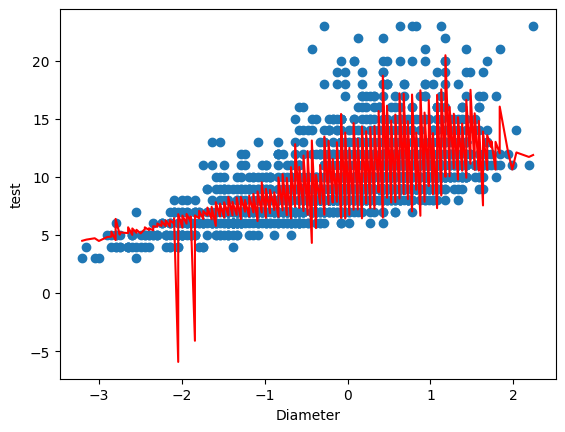

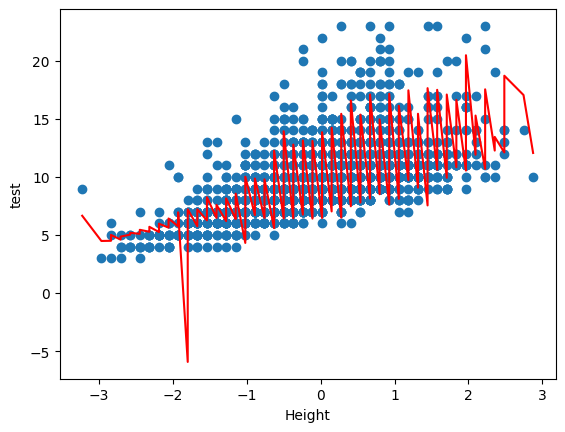

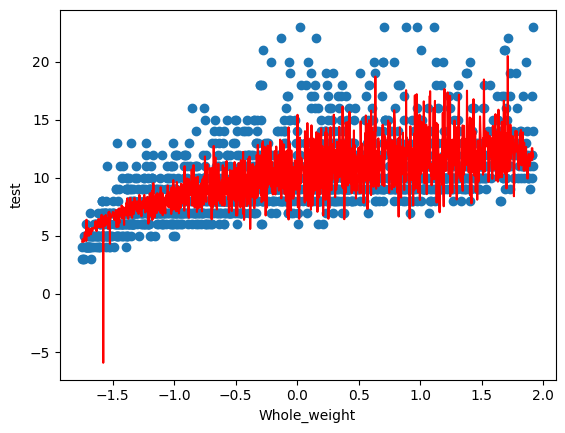

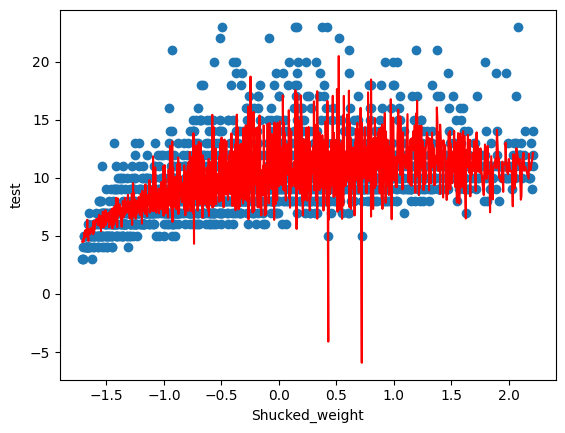

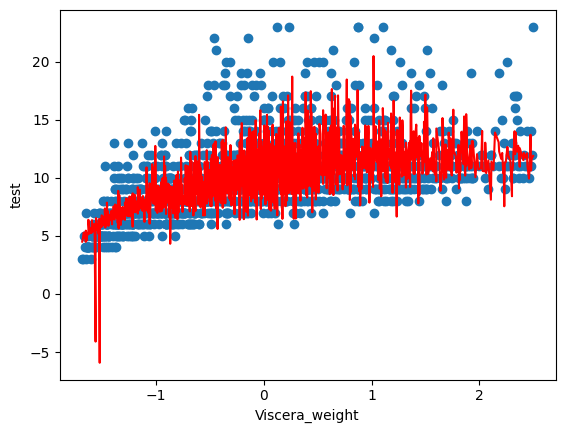

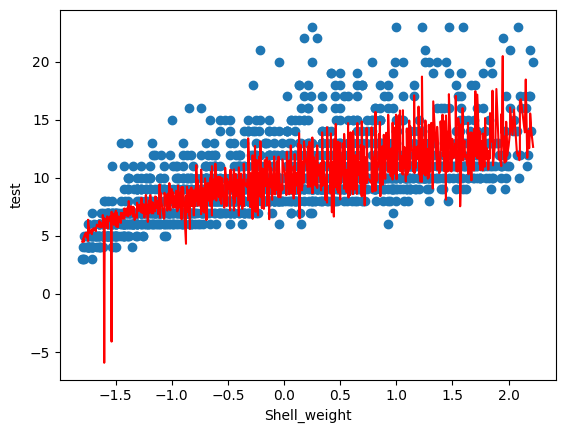

In [73]:
# MODEL PIPELINE
# Linear Regression

from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif

pipeline = make_pipeline(
    preprocessing.OrdinalEncoder(),
    preprocessing.StandardScaler(),
)

model, X_test, y_test = trainPipelineModel(pipeline, LinearRegression())
displayMetrics(model, X_test, y_test, abalone.variables['name'], "test")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients: 
 [[-0.97888322  2.80333081]]
Mean squared error: 6.39
Root mean squared error: 2.53
R2: 0.35


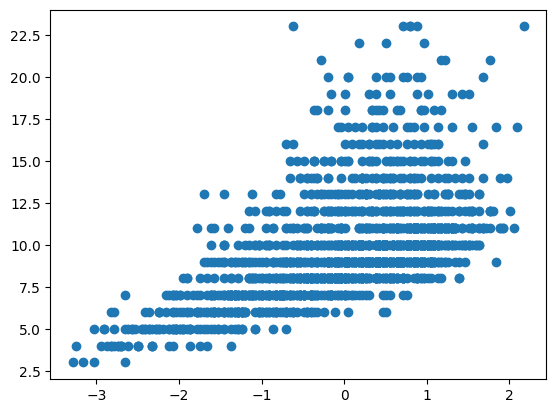

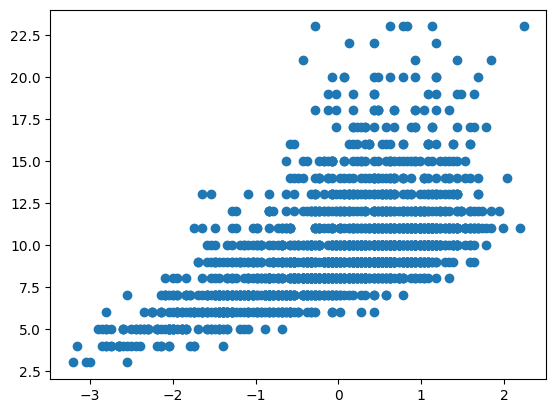

In [57]:
# MODEL PIPELINE
# Linear Regression
# SelectKBest(f_classif)

from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif

pipeline = make_pipeline(
    preprocessing.OrdinalEncoder(),
    preprocessing.StandardScaler(),
    SelectKBest(f_classif, k = 2)
)

model, X_test, y_test = trainPipelineModel(pipeline, LinearRegression())
displayMetrics(model, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=8. All the features will be returned.
  warnings.warn(


Coefficients: 
 [[ 0.05404342 -0.00597808  0.03952248  0.12771156  0.00813674 -0.01410302
  -0.00510893  0.00567277]]
Mean squared error: 5.39
Root mean squared error: 2.32
R2: 0.46


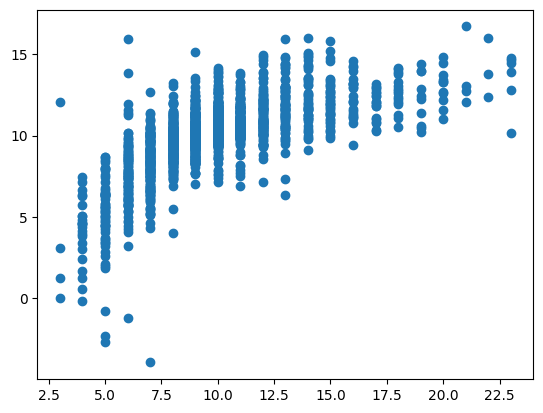

In [41]:
# MODEL PIPELINE
# Linear Regression
# GenericUnivariateSelect(chi2)

from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import GenericUnivariateSelect, chi2

pipeline = make_pipeline(
    preprocessing.OrdinalEncoder(),
    preprocessing.Normalizer(),
    GenericUnivariateSelect(chi2, mode="k_best", param=20)
)

model, X_test, y_test = trainPipelineModel(pipeline, LinearRegression())
displayMetrics(model, X_test, y_test)